In [268]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

import pandas as pd
import numpy as np
import pyDOE

import seaborn as sns
from pandas_helper import *


from generate_doe import *

#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: 
#this controls the font used in the legend
font = {'family' : 'sans serif',
    'size'   : 22}
plt.rc('font', **font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
def cartesian(df1, df2):
    rows = itertools.product(df1.iterrows(), df2.iterrows())

    df = pd.DataFrame(left.append(right) for (_, left), (_, right) in rows)
    return df.reset_index(drop=True)

# number of simulations we can afford

In [270]:
n_sample=300

# weighted case

In [271]:
## dimensions we want to cover

In [272]:
doe_params_simple  = pd.read_excel("doe_parameters_combined.xlsx", sheet_name="simple_dimensions")
doe_params_simple

,demand,OPEC
0,low_1.5,opec_full
1,med_2,opec_contrained
2,high_3,NaN


In [273]:
doe_params_coump  = pd.read_excel("doe_parameters_combined.xlsx", sheet_name="coumpounded_dimensions")
doe_params_coump.columns.name = "dim"
doe_params_coump.index.name = "case"
doe_params_coump

dim,fiscal_pressure,fiscal_regime
case,,
0,fiscal_low,fi_A
1,fiscal_high,fi_B
2,NaN,fi_C


In [274]:
country_gp = pd.read_excel("doe_parameters_combined.xlsx", sheet_name="country_group").set_index("country").squeeze()
country_gp.index.name = "country"
country_gp


country
Brazil       1groupSEP
Colombia     2groupSEP
Venezuela    3groupSEP
trinindad    4groupSEP
uruguay      4groupSEP
Name: group, dtype: object

# simple DOE using one dimension per variable

In [275]:
doe_params_coump

dim,fiscal_pressure,fiscal_regime
case,,
0,fiscal_low,fi_A
1,fiscal_high,fi_B
2,NaN,fi_C


In [276]:
coumpounded_dims =broadcast_simple(doe_params_coump.stack(), country_gp.index).unstack().unstack()
coumpounded_dims

doe_params = pd.concat([doe_params_simple, 
                                             collapse_multi_colum(coumpounded_dims)],
                                            axis=1)
doe_params


,demand,OPEC,Brazil_fiscal_pressure,Brazil_fiscal_regime,Colombia_fiscal_pressure,Colombia_fiscal_regime,Venezuela_fiscal_pressure,Venezuela_fiscal_regime,trinindad_fiscal_pressure,trinindad_fiscal_regime,uruguay_fiscal_pressure,uruguay_fiscal_regime
0,low_1.5,opec_full,fiscal_low,fi_A,fiscal_low,fi_A,fiscal_low,fi_A,fiscal_low,fi_A,fiscal_low,fi_A
1,med_2,opec_contrained,fiscal_high,fi_B,fiscal_high,fi_B,fiscal_high,fi_B,fiscal_high,fi_B,fiscal_high,fi_B
2,high_3,NaN,NaN,fi_C,NaN,fi_C,NaN,fi_C,NaN,fi_C,NaN,fi_C


In [277]:
norm_doe = generate_raw_doe(n_sample,doe_params, verbose=False)

new candidate solution found with max,abs corrcoef = 0.963931796929975


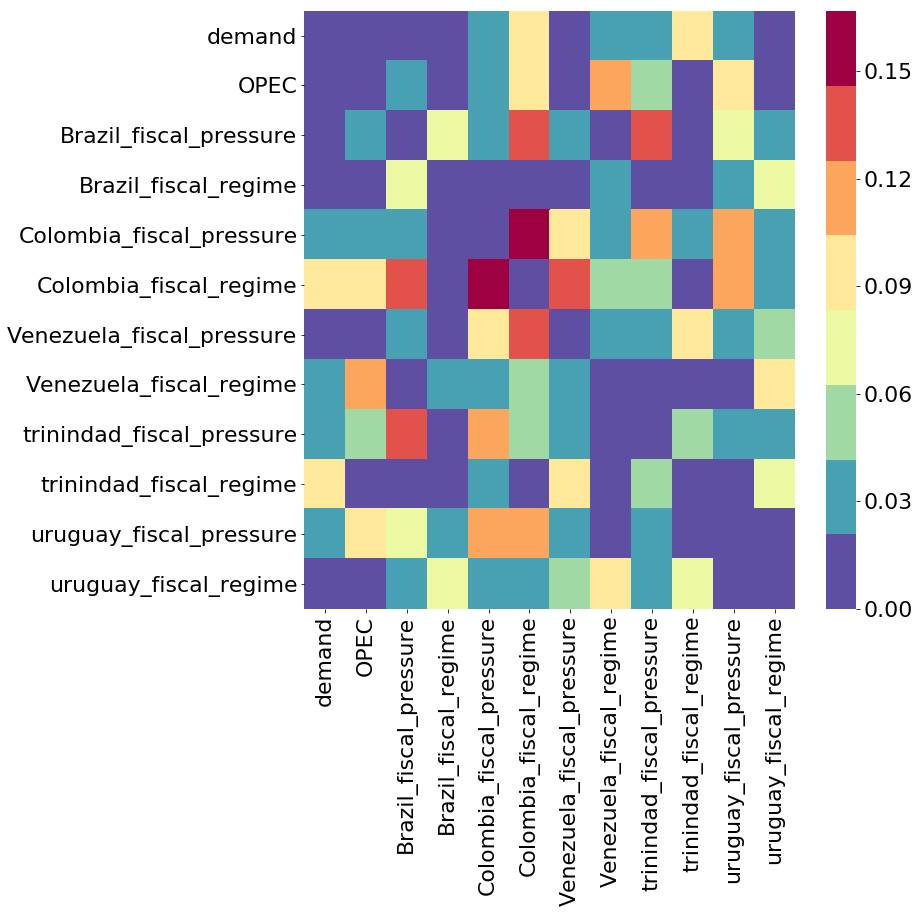

In [278]:
df= map_doe_to_labels (norm_doe, doe_params, numeric=True)
correlation_matrix(df)

In [279]:
df= map_doe_to_labels (norm_doe, doe_params, numeric=False).astype(str)

df.describe()

,demand,OPEC,Brazil_fiscal_pressure,Brazil_fiscal_regime,Colombia_fiscal_pressure,Colombia_fiscal_regime,Venezuela_fiscal_pressure,Venezuela_fiscal_regime,trinindad_fiscal_pressure,trinindad_fiscal_regime,uruguay_fiscal_pressure,uruguay_fiscal_regime
count,300,300,300,300,300,300,300,300,300,300,300,300
unique,3,2,2,3,2,3,2,3,2,3,2,3
top,med_2,opec_contrained,fiscal_high,fi_A,fiscal_high,fi_C,fiscal_high,fi_C,fiscal_high,fi_A,fiscal_high,fi_A
freq,100,150,150,101,150,101,150,101,150,100,150,100


In [280]:
for c in df:
    df[c] = c[:4]+'-'+df[c] 


df.apply(pd.value_counts).sum(axis=1).sort_values()

Braz-fi_B                99.0
Colo-fi_B                99.0
Vene-fi_B                99.0
Braz-fi_C               100.0
urug-fi_C               100.0
urug-fi_B               100.0
Colo-fi_A               100.0
urug-fi_A               100.0
trin-fi_C               100.0
trin-fi_B               100.0
trin-fi_A               100.0
dema-med_2              100.0
Vene-fi_A               100.0
dema-low_1.5            100.0
dema-high_3             100.0
Braz-fi_A               101.0
Vene-fi_C               101.0
Colo-fi_C               101.0
Vene-fiscal_high        150.0
urug-fiscal_high        150.0
OPEC-opec_full          150.0
OPEC-opec_contrained    150.0
Colo-fiscal_low         150.0
Colo-fiscal_high        150.0
trin-fiscal_high        150.0
trin-fiscal_low         150.0
Braz-fiscal_low         150.0
Braz-fiscal_high        150.0
Vene-fiscal_low         150.0
urug-fiscal_low         150.0
dtype: float64

#  DOE grouping some variables in comon dimenion

In [ ]:
sep = "ç_\$"

#this time we take the country groups, not the country, to multiply the dimensons
coumpounded_dims =broadcast_simple(doe_params_coump.stack(), country_gp+sep).unstack().unstack()
coumpounded_dims

doe_params = pd.concat([doe_params_simple, 
                                             collapse_multi_colum(coumpounded_dims)],
                                            axis=1)
doe_params

,demand,OPEC,1groupSEPç_\$_fiscal_pressure,1groupSEPç_\$_fiscal_regime,2groupSEPç_\$_fiscal_pressure,2groupSEPç_\$_fiscal_regime,3groupSEPç_\$_fiscal_pressure,3groupSEPç_\$_fiscal_regime,4groupSEPç_\$_fiscal_pressure,4groupSEPç_\$_fiscal_regime
0,low_1.5,opec_full,fiscal_low,fi_A,fiscal_low,fi_A,fiscal_low,fi_A,fiscal_low,fi_A
1,med_2,opec_contrained,fiscal_high,fi_B,fiscal_high,fi_B,fiscal_high,fi_B,fiscal_high,fi_B
2,high_3,NaN,NaN,fi_C,NaN,fi_C,NaN,fi_C,NaN,fi_C


In [ ]:
norm_doe = generate_raw_doe(n_sample,doe_params, verbose=False)

new candidate solution found with max,abs corrcoef = 0.9664076569879544


In [ ]:
df= map_doe_to_labels (norm_doe, doe_params, numeric=True)
df.dtypes
df.describe()

df.columns = pd.MultiIndex.from_tuples([k.split(sep+"_") for k in df])
df = df.rename(columns={np.nan:""})
# [process_index(c) for c in df]
df.head()




a = df.stack(1)
a
for i in country_gp.index:
    a[i] = a[country_gp[i]]

for c in country_gp.unique():
    a = a.drop(c,axis=1)

df =collapse_multi_colum(a.unstack()).dropna(how="all",axis=1).rename(columns= lambda s:s.strip("_"))
correlation_matrix(df)

In [ ]:
mat = df.corr().abs().values
# np.fill_diagonal(mat, 0)
# corr=pd.DataFrame(mat, index=df.columns, columns=df.columns)
mat